# $$ Assignment Machine Learning $$

## <span style="color:red">Initializing Packages and Importing Data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/Train.csv")
test = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/Test.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## <span style="color:red">Get Inference from Pandas Profiling Report</span>

In [4]:
!pip install pandas_profiling

In [5]:
#For getting detailed report about the data - whether any missing value etc. 
import pandas_profiling as pd_prof
pd_prof.ProfileReport(train)

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


## <span style="color:red">Check Distribution of the target variable : Item_Outlet_Sales</span>

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

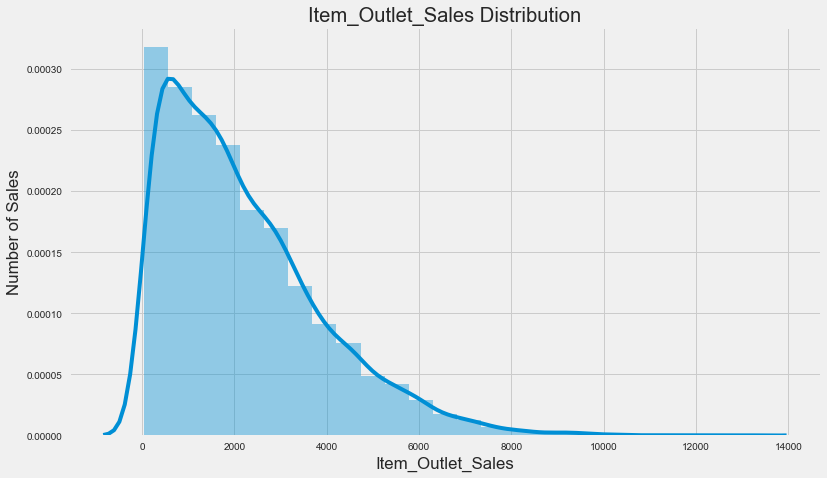

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [9]:
# By making of Distribution Graph we can assume that there is some skewness in the item_Outlet_Sales
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


## <span style="color:red">Check Distribution of the Numerical variables</span>

In [10]:
numeric_var = train.select_dtypes(include=[np.number])
numeric_var.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [11]:
numeric_var.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


> The Heat map of the above correlation matrix of the numerical variable is visible in the pandas profiling report.

## <span style="color:red">Check Distribution of the Categorical variables</span> 

In [12]:
car_var = train.select_dtypes(include=[object])
car_var.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

> ###  <b><i><span style="color:green">1. Distribution of the Item_Fat_Content</span>

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

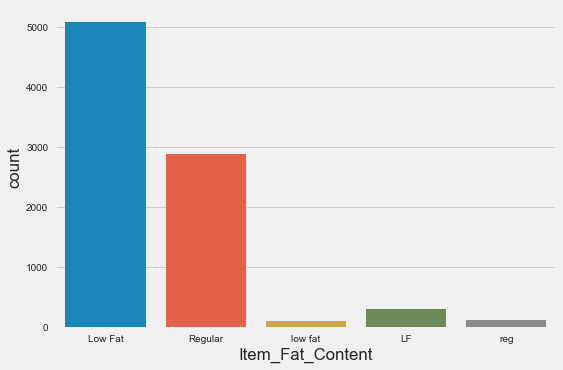

In [14]:
sns.countplot(train.Item_Fat_Content)

> ###  <b><i><span style="color:green">2. Distribution of the Item_Type</span>

In [15]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

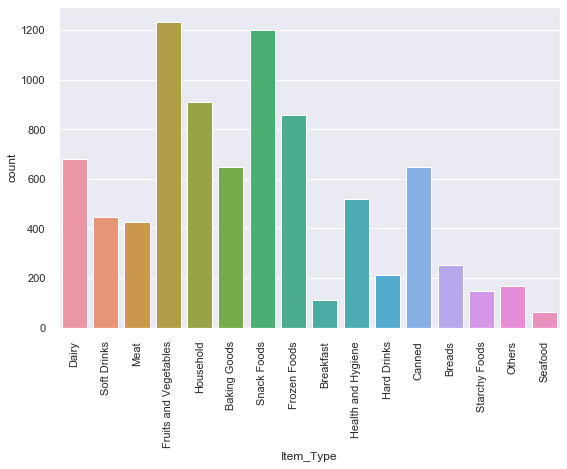

In [16]:
sns.set(style="darkgrid")
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

> ###  <b><i><span style="color:green">3. Distribution of the Outlet_Size</span>

In [17]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

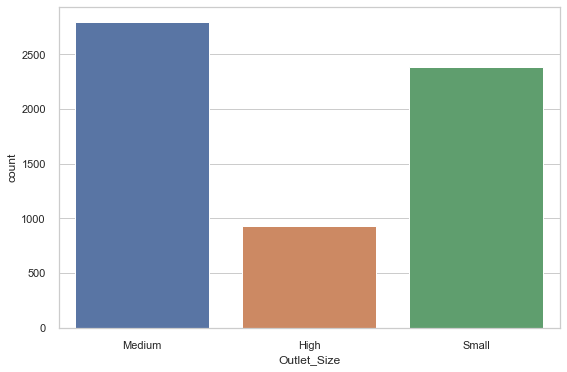

In [18]:
sns.set(style="whitegrid")
sns.countplot(train.Outlet_Size)
#plt.xticks(rotation=90)

> ###  <b><i><span style="color:green">4. Distribution of the Outlet_Location_Type</span>

In [19]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

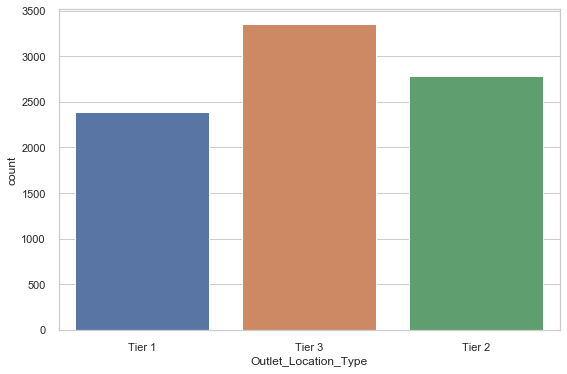

In [20]:
#sns.set(style="darkgrid")
sns.countplot(train.Outlet_Location_Type)
#plt.xticks(rotation=90)

> ###  <b><i><span style="color:green">5. Distribution of the Outlet_Type</span> 

In [21]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

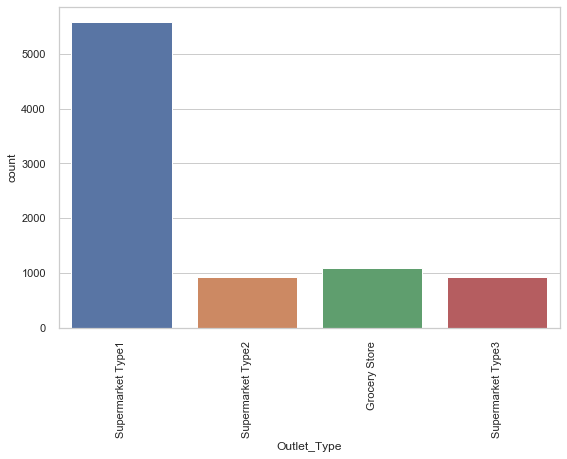

In [22]:
#sns.set(style="darkgrid")
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

## <span style="color:red">Bivariate Distribution</span>

###  <b><i><span style="color:green">Numerical Variables</span> 

In [23]:
numeric_var = train.select_dtypes(include=[np.number])
numeric_var.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

> ###  <b><i><span style="color:green">Item_Weight and Item_Outlet_Sales Analysis</span>

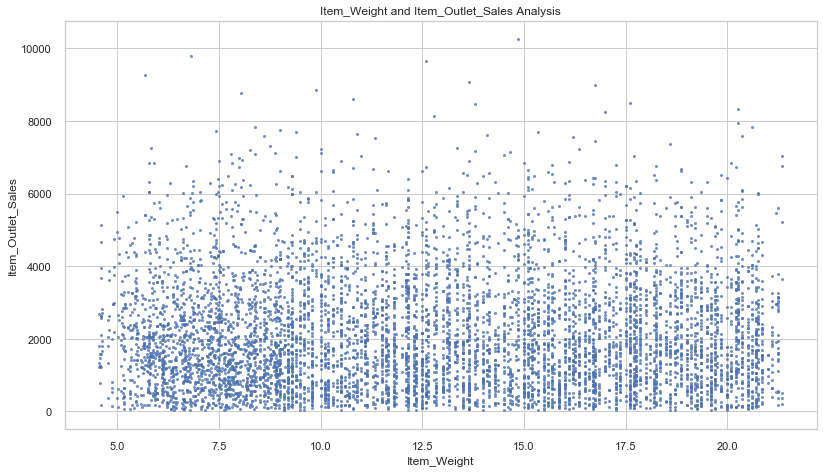

In [24]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.8)

> ###  <b><i><span style="color:green">Item_Visibility and Item_Outlet_Sales Analysis</span>

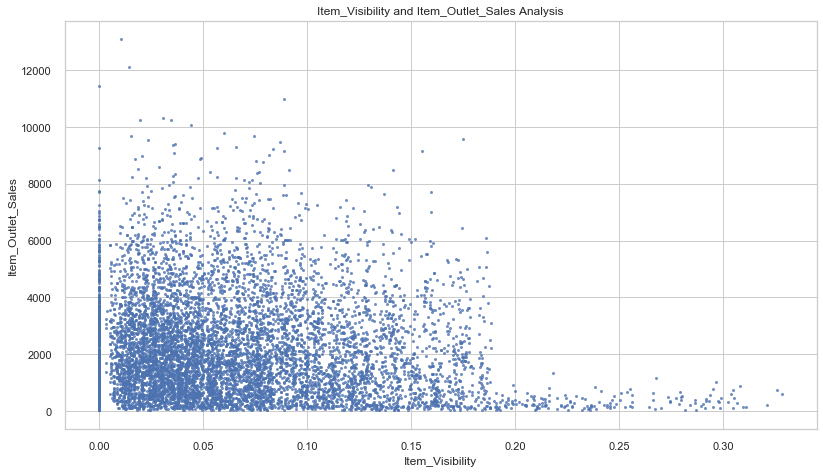

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.8)

> ###  <b><i><span style="color:green">Item_MRP and Item_Outlet_Sales Analysis</span>

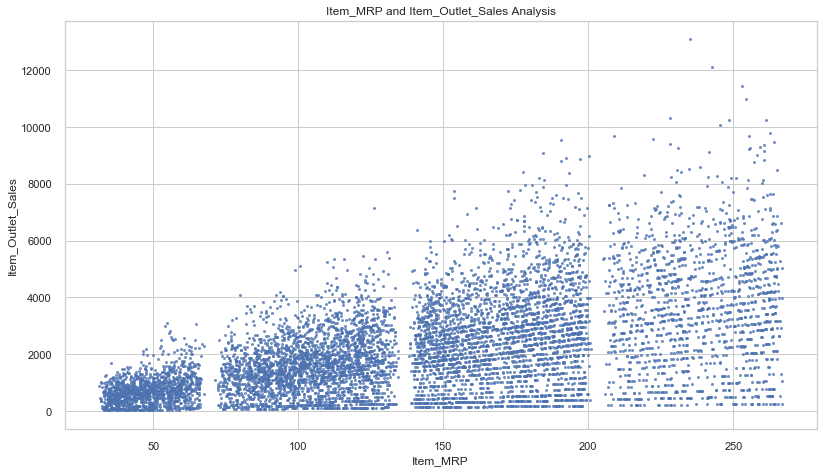

In [26]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.8)

> ###  <b><i><span style="color:green">Outlet_Establishment_Year and Item_Outlet_Sales Analysis</span>

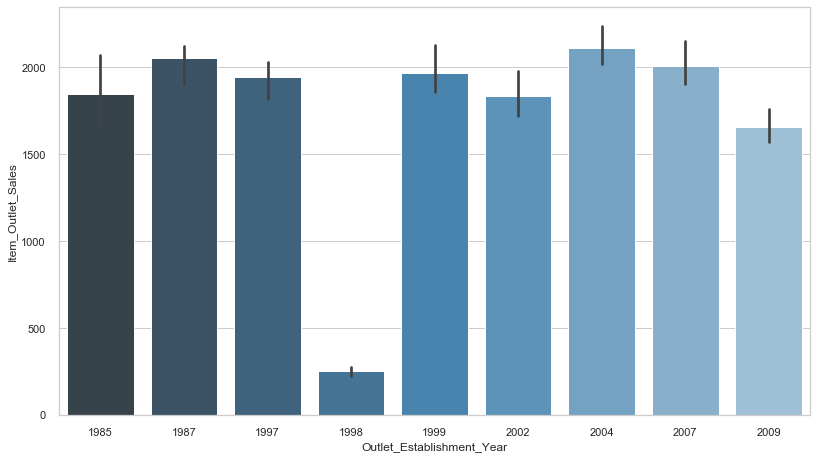

In [27]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues_d")

###  <b><i><span style="color:green"> Categorical Variables</span>

In [28]:
car_var = train.select_dtypes(include=[object])
car_var.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

> ###  <b><i><span style="color:green">Impact of Item_Identifier on Item_Outlet_Sales</span>

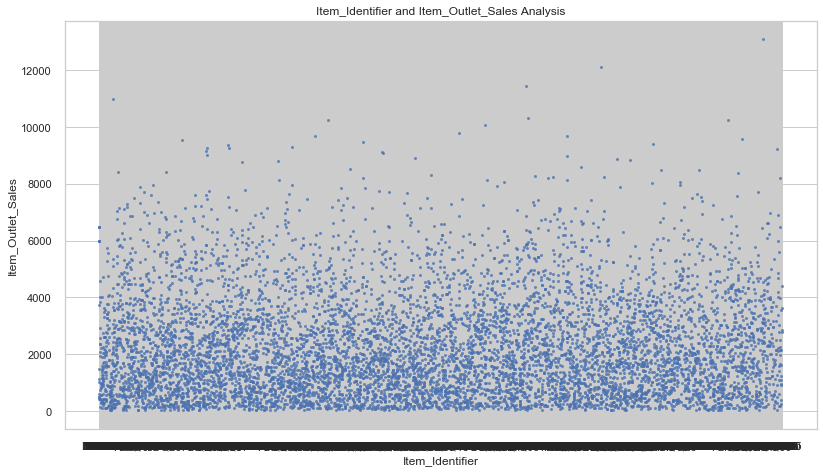

In [29]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Identifier and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Identifier, train["Item_Outlet_Sales"],'.', alpha = 0.8)

> ###  <b><i><span style="color:green">Impact of Item_Fat_Content on Item_Outlet_Sales</span>

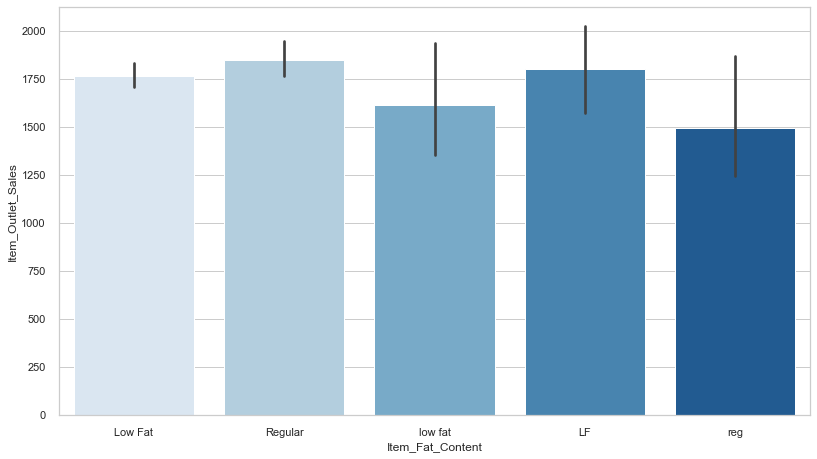

In [30]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues")

> ###  <b><i><span style="color:green">Impact of Item_Type on Item_Outlet_Sales</span>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

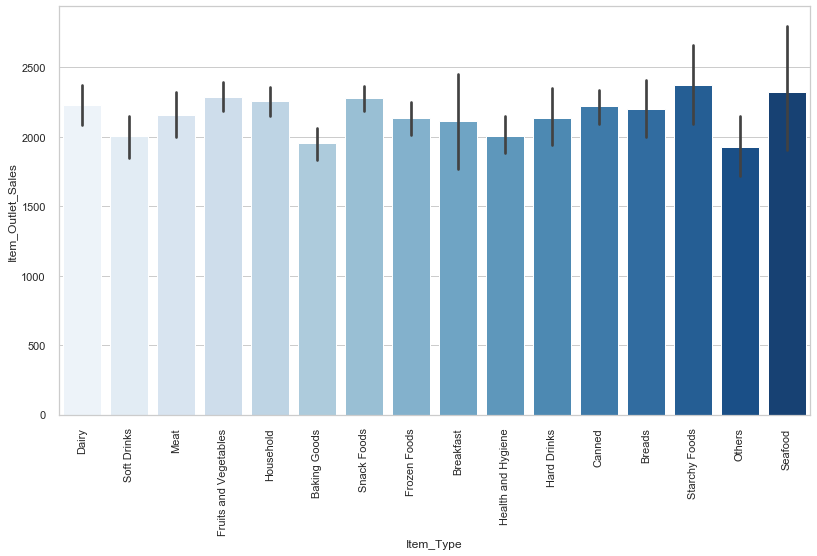

In [31]:
from numpy import mean
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=train, estimator=mean, palette="Blues")
plt.xticks(rotation=90)

> ###  <b><i><span style="color:green">Impact of Item_Type vs Item_Visibility</span>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

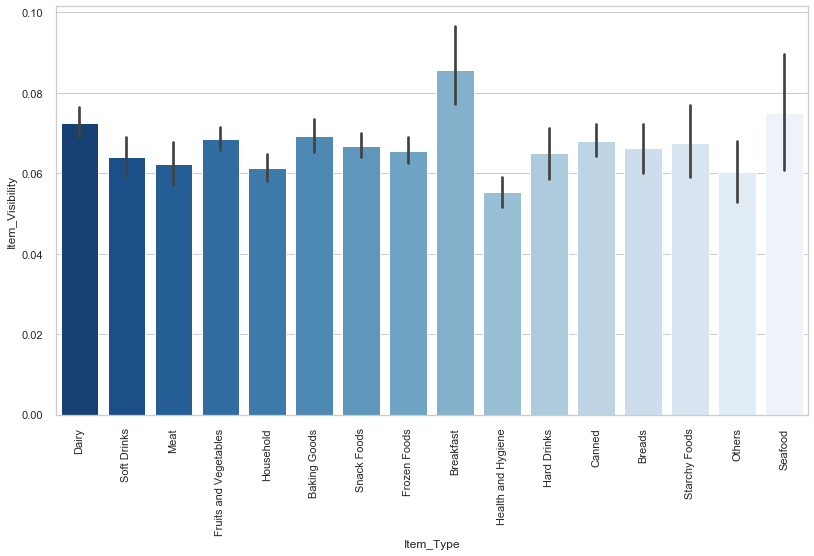

In [32]:
from numpy import mean
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Item_Type", y="Item_Visibility", data=train, estimator=mean, palette="Blues_r")
plt.xticks(rotation=90)

> ###  <b><i><span style="color:green">Impact of Outlet_Identifier on Item_Outlet_Sales</span>

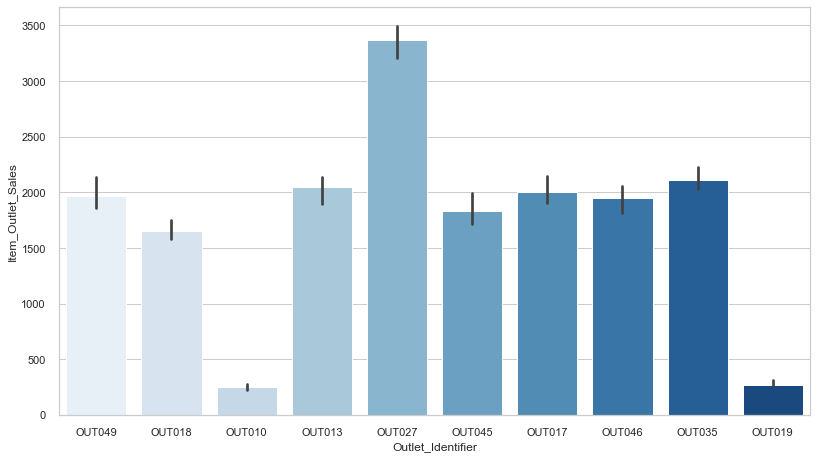

In [33]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues")

In [34]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())


Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [35]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


> ###  <b><i><span style="color:green">Impact of Outlet_Size on Item_Outlet_Sales</span>

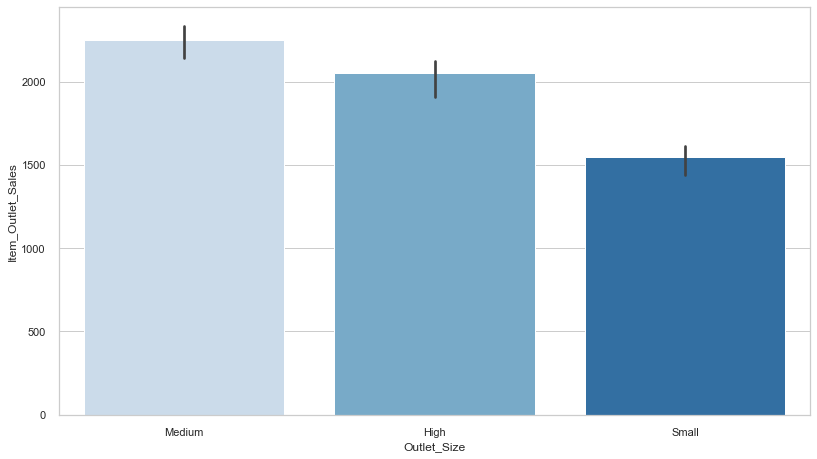

In [36]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues")

> ###  <b><i><span style="color:green">Impact of Outlet_Location_Type on Item_Outlet_Sales</span>

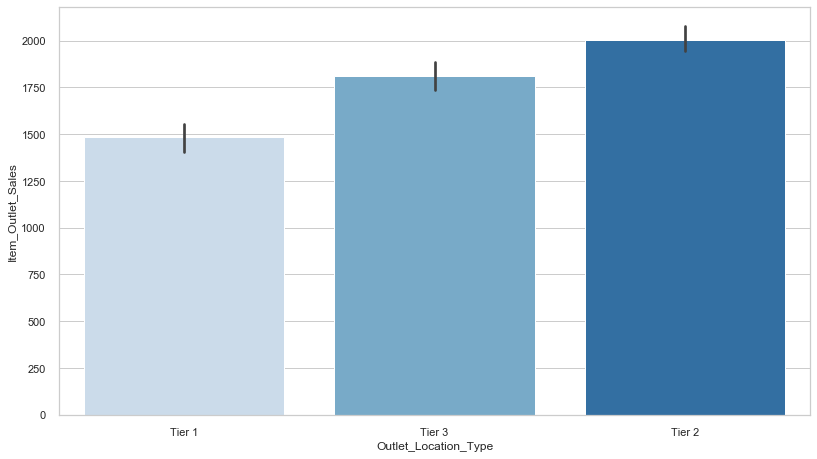

In [37]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues")

In [38]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


> ###  <b><i><span style="color:green">Impact of Outlet_Type on Item_Outlet_Sales</span>

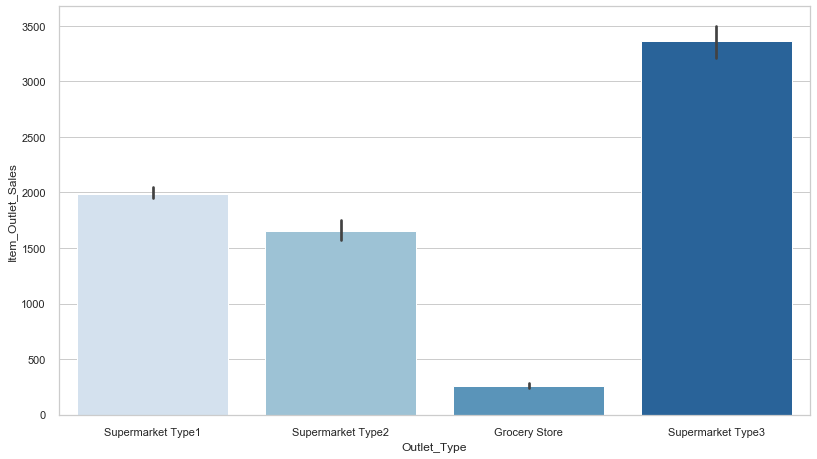

In [39]:
from numpy import median
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train, estimator=median, palette="Blues")

<b><i><span style="color:purple">We can show that in Below Box Plot the Item_visibility and item_outlet_sales have some outliers</span>

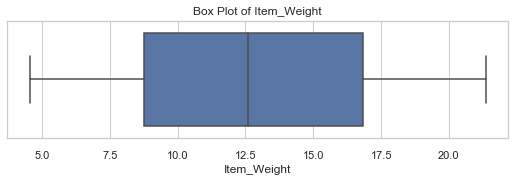

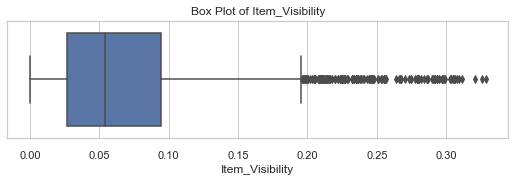

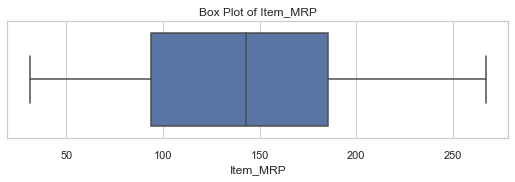

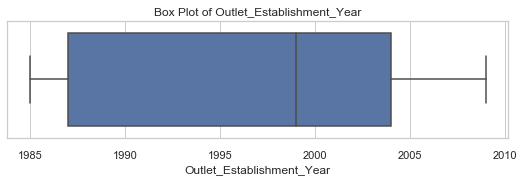

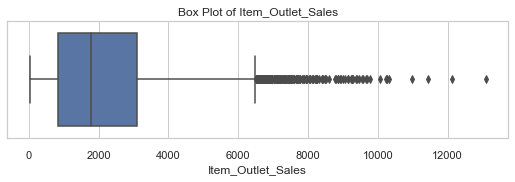

In [40]:

for num_variable in numeric_var:
    fig,axes = plt.subplots(figsize=(8,2))
    sns.boxplot( x=num_variable, data = numeric_var)
    plt.title(str('Box Plot of ') + str(num_variable))
    #bp.savefig(fig)
#bp.close()


## <span style="color:red">Data Pre-Processing</span>

> ###  <b><i><span style="color:green">Looking for missing values</span>

In [41]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
    
data = pd.concat([train,test], ignore_index = True)
data.to_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/data.csv",index=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


> ###  <b><i><span style="color:green">Imputing missing values in item_weight by mean</span>

In [42]:
#aggfunc is mean by default! Ignores NA by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [43]:
def impute_missing_weight(cols):
    weight = cols[0]
    identifier = cols[1]
    if pd.isnull(weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == identifier]
    else:
        return weight

In [44]:
print ('Orignal missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_missing_weight,axis=1).astype(float)
print ('Final missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal missing: 2439
Final missing: 0


> ###  <b><i><span style="color:green">Imputing missing values in outlet_size by mode</span>

In [45]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [46]:
def impute_size_mode(cols):
    size = cols[0]
    type = cols[1]
    if pd.isnull(size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == type][0]
    else:
        return size
print ('Orignal missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal missing: 4016
Final missing: 0


> ###  <b><i><span style="color:green">Looking for zero values in Item_Visibility</span>

In [47]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values = "Item_Visibility", index = "Item_Identifier")
visibility_item_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [48]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility


In [49]:
print ('Original zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final zeros: %d'%sum(data['Item_Visibility'] == 0))

Original zeros: 879
Final zeros: 0


> ###  <b><i><span style="color:green">Determine the years of operation of a store</span>

In [50]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

> ###  <b><i><span style="color:green">Create a broad category of Type of Item</span>

In [51]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

> ###  <b><i><span style="color:green">Modify categories of Item_Fat_Content</span>

In [52]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [53]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## <span style="color:red">Creating Dummy variables for Numerical and Categorical Variables</span>

In [54]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [55]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,14,1,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,4,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,14,1,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,15,1,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,26,2,1


In [56]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

## <span style="color:red">Exporting Data</span>

In [57]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/train_modified.csv",index=False)
test.to_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/test_modified.csv",index=False)

## <span style="color:red">Model, predict and solve the problem</span>

In [58]:
train_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/train_modified.csv")
test_new= pd.read_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/Assignment1_PGD B7/Assignment1_PGD B7/test_modified.csv")

In [59]:
train_new.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


> ###  <b><i><span style="color:green">Checking Accuracy of Model using Linear Regression</span>

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge, Lasso

In [61]:
# collecting X and Y
x = train_new.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1) # Independent variable
y = train_new['Item_Outlet_Sales'] # Independent variable
 # Dependent variables
#print(x)
#print(y)

In [62]:
# splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=3)
print(len(x_train), len(x_test))

6392 2131


In [63]:
# Model Initialisation
reg = LinearRegression(normalize=True)
# Data Fitting
reg = reg.fit(x_train,y_train)
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [ 1.54438587e+01 -8.22604332e+01  3.54479252e+00 -2.23661492e+14
  1.07791485e+16 -2.44440195e+16  1.07791485e+16  3.81313328e+16
  3.51115797e+16  6.98898201e+16  6.30664307e+16 -3.06035833e+15
 -2.85247504e+16 -3.72857389e+15 -6.76745484e+15 -3.14052362e+15
 -9.26145509e+15 -1.91476225e+16 -1.91476225e+16  1.60755454e+16
 -8.04214238e+15 -9.41341661e+16  2.77620255e+16 -3.65548611e+16
  2.66239444e+16 -2.50660539e+16  2.84330100e+16  2.88803330e+16
  2.69788874e+16  1.06717236e+15]
Intercept:  -1.78709570319298e+16


In [64]:
# Y prediction
y_pred = reg.predict(x_test)
y_pred

array([2968., 2076.,  432., ..., 4234., 2648., 1892.])

In [65]:
# Model Evaluation 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('RMSE= ',rmse)
print('Regressor score is =', r2)

RMSE=  1091.5761258001862
Regressor score is = 0.5890439297453616


Text(0.5, 1.0, 'Residual Plot')

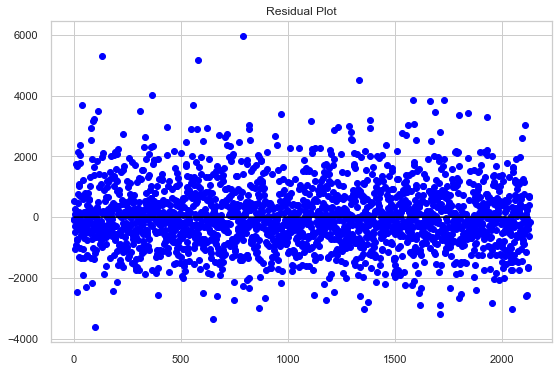

In [66]:
# Residual plot
x1 = [i for i in range(1, len(y_pred)+1)]

x_plot = plt.scatter(x1, (y_test - y_pred), c='blue')
plt.plot(x1,[0]*len(y_pred),c='black')

plt.title('Residual Plot')

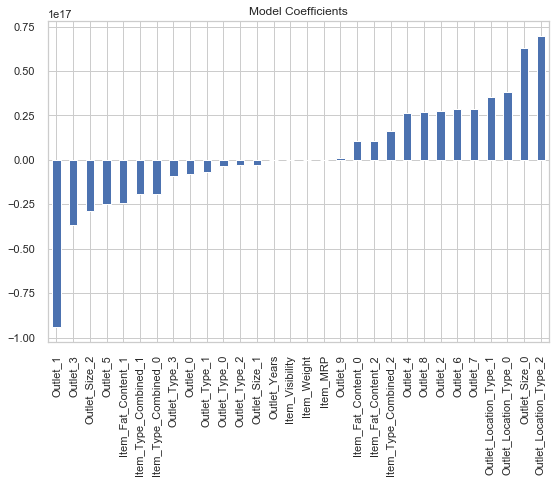

In [67]:
predictors = x_train.columns
coef1 = pd.Series(reg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

> ###  <b><i><span style="color:green">Checking Accuracy of Model using Ridge Regression (L2 Regularisation)</span>

In [68]:
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train, y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('RMSE =', rmse)
print('R2 =', r2)

RMSE = 1092.5173460281214
R2 = 0.5883349239000786


In [69]:
# Checking with all alpha values

alpha_range = [0.01,0.05,0.5,5]

for i in alpha_range:
    ridgeReg = Ridge(i, normalize=True)
    ridgeReg.fit(x_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print('alpha =', i)
    print('RMSE =', rmse)
    print('R2 =', r2)
    

alpha = 0.01
RMSE = 1090.6425218868262
R2 = 0.5897465946598859
alpha = 0.05
RMSE = 1092.5173460281214
R2 = 0.5883349239000786
alpha = 0.5
RMSE = 1152.493037730714
R2 = 0.5418961267412796
alpha = 5
RMSE = 1478.5311064264986
R2 = 0.24604005388574968


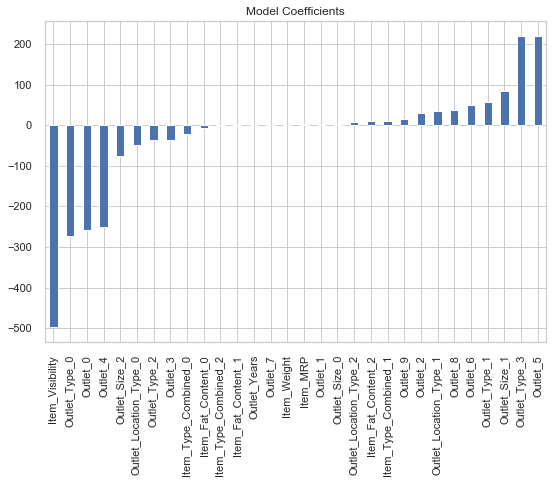

In [70]:
predictors = x_train.columns
coef2 = pd.Series(ridgeReg.coef_, predictors).sort_values()
coef2.plot(kind = 'bar', title = 'Model Coefficients')

> ###  <b><i><span style="color:green">Checking Accuracy of Model using Lasso Regression (L1 Regularization)</span>

In [71]:
# alpha_range = [0.01,0.05,0.5,5]

lassoReg = Lasso(alpha=0.01, normalize=True)
lassoReg.fit(x_train, y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('RMSE =', rmse)
print('R2 =', r2)

RMSE = 1090.401149477525
R2 = 0.5899281626682746


In [72]:
# Checking with all alpha values

alpha_range = [0.01,0.05,0.5,5]

for i in alpha_range:
    lassoReg = Lasso(i, normalize=True)
    lassoReg.fit(x_train, y_train)
    pred = lassoReg.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print('alpha =', i)
    print('RMSE =', rmse)
    print('R2 =', r2)

alpha = 0.01
RMSE = 1090.401149477525
R2 = 0.5899281626682746
alpha = 0.05
RMSE = 1090.5249827720315
R2 = 0.5898350163429691
alpha = 0.5
RMSE = 1095.4975511894813
R2 = 0.5860859532906844
alpha = 5
RMSE = 1295.0198726473259
R2 = 0.4215841187884576


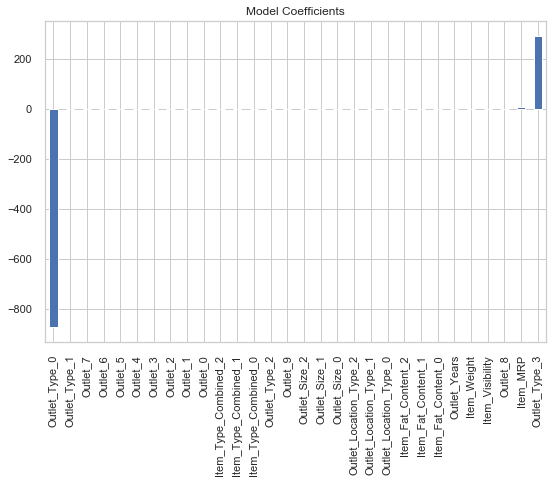

In [73]:
predictors = x_train.columns
coef3 = pd.Series(lassoReg.coef_, predictors).sort_values()
coef3.plot(kind = 'bar', title = 'Model Coefficients')

> ###  <b><i><span style="color:purple">So we can say that linear regression best model is better other that Lasso and Ridge because R<sup>2</sup> is greater i.e 0.5899</span>

## <span style="color:red">Using best model i.e Linear Regression, predict the values of sales for the data given in the file Test.csv</span>

In [74]:
#Predict training set:
predictors = train_new.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
train_new_predictions = reg.predict(train_new[predictors])
target = 'Item_Outlet_Sales'

In [75]:
# make predictions using actual model
test_new[target] = reg.predict(test_new[predictors])
test_new[target]

0       1866.0
1       1532.0
2       1774.0
3       2508.0
4       5104.0
         ...  
5676    2352.0
5677    2352.0
5678    1820.0
5679    3524.0
5680    1296.0
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

> ### <span style="color:green">compute RMSE and R<sup>2</sup></span>

In [84]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
#from sklearn impfrom sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score


def modelfit(alg, dtrain, dtest, predictors, target, IDcol):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=25, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    #print("RMSE : %.4g" % np.sqrt(mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    #print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    rmse = np.sqrt(mean_squared_error((dtrain[target]).values, dtrain_predictions))
    r2 = r2_score((dtrain[target]).values, dtrain_predictions)
    print('RMSE =', rmse)
    print('R2 =', r2)
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    dtest[target].to_csv("C:/Users/Aakash Sharma/Desktop/Machine_Learning/sample_sales.csv")
    



Model Report
RMSE = 1127.481198784062
R2 = 0.5634266854012925


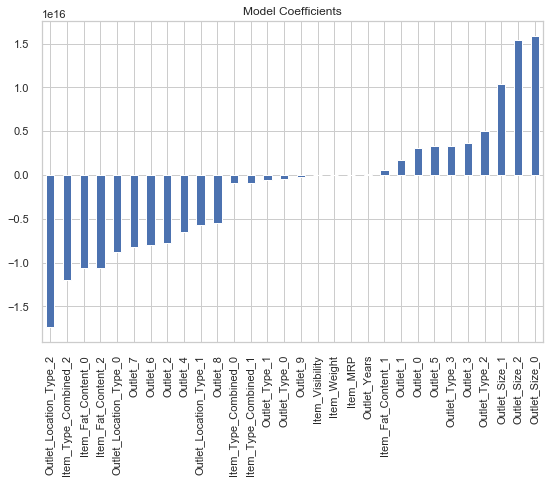

In [77]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(normalize=True)

predictors = train_new.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_new, test_new, predictors, target, IDcol)

coef111 = pd.Series(LR.coef_, predictors).sort_values()
coef111.plot(kind='bar', title='Model Coefficients')

# $$ Report End $$